In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [36]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [37]:
df.drop_duplicates()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [39]:
x=df.drop(['target'],axis=1).values                        #removing last column
y=df['target'].values
print(x,y)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)         
#by keeping testsize 0.3 it means 70% is giving to training data set and remaining 30% to testing data

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [42]:
dt.score(x_train,y_train)*100

100.0

In [43]:
dt.score(x_test,y_test)*100

47.22222222222221

In [44]:
y_pred=dt.predict(x_test)
print(y_pred)

[0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 0.]


In [45]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4722222222222221

In [46]:
pred_y_df=pd.DataFrame({'Actual_Value':y_test,'Predicted Values':y_pred,'Difference':y_test-y_pred,'percentage':(y_test-y_pred)  /y_test})
pred_y_df

C:\Users\mujay\AppData\Local\Temp\ipykernel_6416\4259805024.py:1: RuntimeWarning: divide by zero encountered in true_divide
  pred_y_df=pd.DataFrame({'Actual_Value':y_test,'Predicted Values':y_pred,'Difference':y_test-y_pred,'percentage':(y_test-y_pred)  /y_test})
C:\Users\mujay\AppData\Local\Temp\ipykernel_6416\4259805024.py:1: RuntimeWarning: invalid value encountered in true_divide
  pred_y_df=pd.DataFrame({'Actual_Value':y_test,'Predicted Values':y_pred,'Difference':y_test-y_pred,'percentage':(y_test-y_pred)  /y_test})


,Actual_Value,Predicted Values,Difference,percentage
0,1,0.0,1.0,1.0
1,0,0.0,0.0,NaN
2,1,1.0,0.0,0.0
3,1,1.0,0.0,0.0
4,0,0.0,0.0,NaN
...,...,...,...,...
71,1,1.0,0.0,0.0
72,0,0.0,0.0,NaN
73,0,0.0,0.0,NaN
74,1,1.0,0.0,0.0


In [47]:
dt.score(x_train, y_train)

1.0

In [133]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Load dataset
data = pd.read_csv('heart.csv')

# Check for missing values
print(data.isnull().sum())





age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


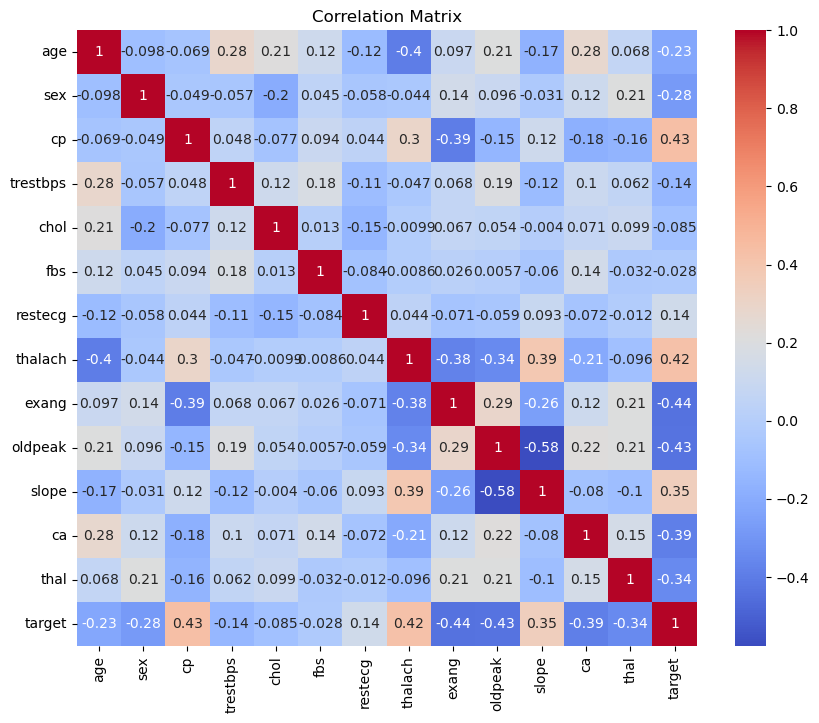

In [134]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [135]:
print(data['sex'].unique())  # Check unique values in the 'sex' column


[1 0]


In [136]:
# Define features and target
X = data.drop(columns='target')
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [137]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Linear Regression": LinearRegression()
}



In [138]:
# Initialize results dictionary to store metrics for each model
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    if name == "Linear Regression":
        # Metrics for regression models
        # Calculate R² score
        r2 = r2_score(y_test, y_pred)
        # Calculate Mean Absolute Error
        mae = mean_absolute_error(y_test, y_pred)
        # Calculate Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)
        
        results[name] = {
            'R² Score': r2,
            'MAE': mae,
            'MSE': mse
        }
    else:
        # Metrics for classification models
        # Calculate Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Calculate F1-score (more informative for imbalanced classes)
        f1 = f1_score(y_test, y_pred)
        
        # For ROC AUC, we need to check if the model supports predict_proba
        if hasattr(model, "predict_proba"):
            auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # For binary classification
        else:
            auc = "N/A"  # Some models like SVM don't have predict_proba by default
        
        results[name] = {
            'Accuracy': accuracy,
            'F1 Score': f1,
            'ROC AUC': auc
        }


C:\Users\mujay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [139]:
 #Convert results into DataFrame for better visualization
results_df = pd.DataFrame(results).T

# Display results
print(results_df)

# Optionally, plot the model comparison (you might want to plot separate regression vs. classification results)
import matplotlib.pyplot as plt

# Plot only classification models with Accuracy, F1 Score, and ROC AUC
classification_metrics = results_df.loc[:, ['Accuracy', 'F1 Score', 'ROC AUC']]


                     Accuracy  F1 Score   ROC AUC  R² Score       MAE  \
Logistic Regression  0.852459  0.857143  0.926724       NaN       NaN   
Random Forest        0.868852     0.875  0.933728       NaN       NaN   
SVM                  0.868852  0.870968       N/A       NaN       NaN   
KNN                  0.918033  0.920635  0.917565       NaN       NaN   
Gradient Boosting    0.786885  0.793651   0.90194       NaN       NaN   
Linear Regression         NaN       NaN       NaN  0.533789  0.266837   

                          MSE  
Logistic Regression       NaN  
Random Forest             NaN  
SVM                       NaN  
KNN                       NaN  
Gradient Boosting         NaN  
Linear Regression    0.116271  


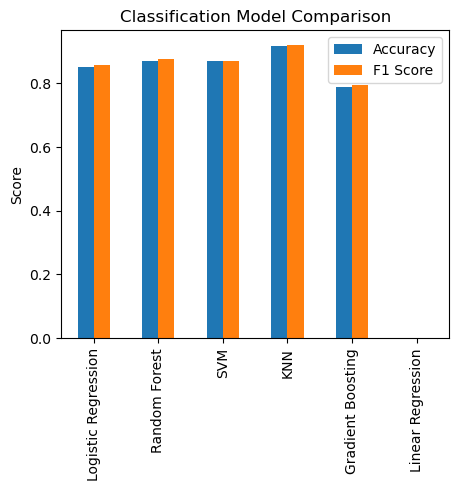

In [140]:
# Plot for classification models
classification_metrics.plot(kind='bar', figsize=(5, 4))
plt.title('Classification Model Comparison')
plt.ylabel('Score')
plt.show()



In [141]:
# Plot for regression models (R², MAE, MSE)
regression_metrics = results_df.loc[:, ['R² Score', 'MAE', 'MSE']]


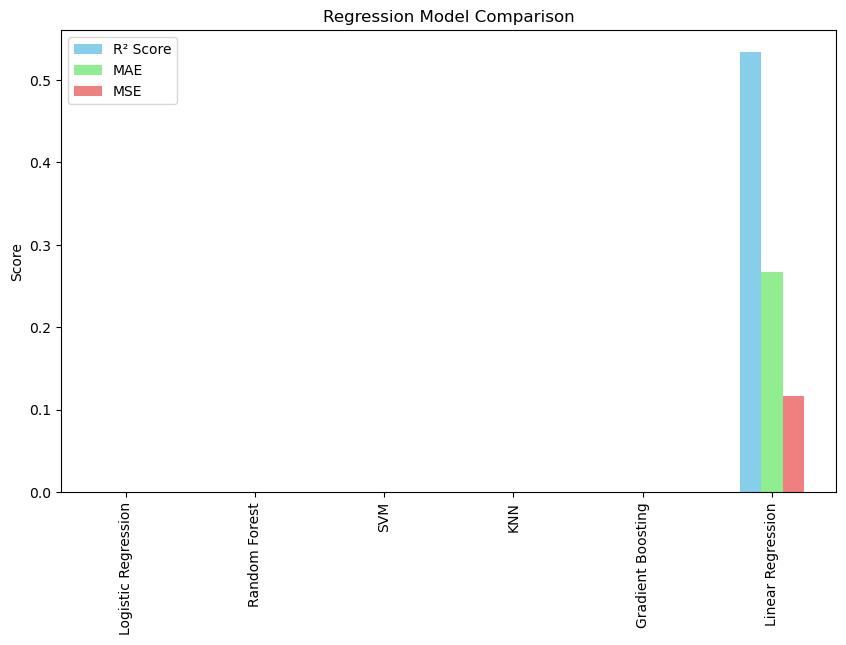

In [142]:
# Plot for regression models
regression_metrics.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Regression Model Comparison')
plt.ylabel('Score')
plt.show()